In [66]:
import cv2
import numpy as np
import pandas as pd
import zipfile
import matplotlib.pyplot as plt

In [67]:
import tensorflow
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras import layers
tensorflow.__version__

'2.12.0'

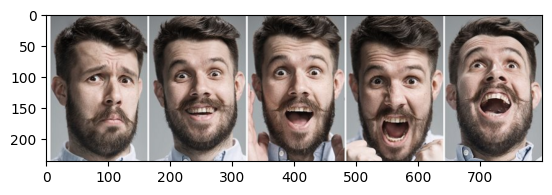

In [68]:
imagem = cv2.imread('C:/Users/kaiqu/lamia-bootcamp/CARD 22/Material/testes/teste01.png')
imagem = cv2.cvtColor(imagem, cv2.COLOR_BGR2RGB)
plt.imshow(imagem)

In [69]:
cascade_faces = 'C:/Users/kaiqu/lamia-bootcamp/CARD 22/Material/haarcascade_frontalface_default.xml'
caminho_modelo = 'C:/Users/kaiqu/lamia-bootcamp/CARD 22/Material/modelo_01_expressoes.h5'
face_detection = cv2.CascadeClassifier(cascade_faces) # detecção de faces

classificador_emocoes = load_model(caminho_modelo, compile = False)
expressoes = ["Raiva", "Nojo", "Medo", "Feliz", "Triste", "Surpreso", "Neutro"]


In [70]:
original = imagem.copy()
faces = face_detection.detectMultiScale(original, scaleFactor = 1.1,
                                        minNeighbors = 3, minSize = (20, 20)) # detectou a posição dos pixeis da face
faces

array([[328,  27, 163, 163],
       [171,  33, 158, 158],
       [ 32,  46, 145, 145],
       [660,  28, 130, 130],
       [482,  44, 163, 163]])

In [71]:
imagem.shape # rgb

(236, 800, 3)

In [72]:
len(faces)

5

In [73]:
faces.shape

(5, 4)

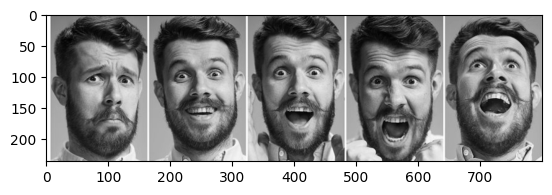

In [74]:
# extração do roi region of interest
cinza = cv2.cvtColor(original, cv2.COLOR_BGR2GRAY)
plt.imshow(cinza, cmap='gray')

In [75]:
cinza.shape

(236, 800)

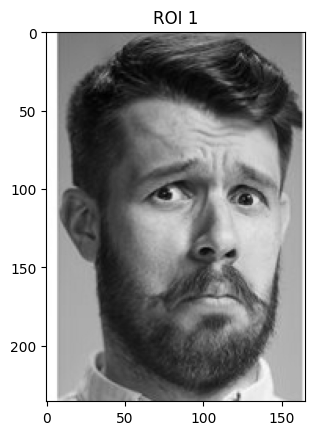

In [76]:
roi1 = cinza[0:250, 0:165]

plt.title('ROI 1')
plt.imshow(roi1, cmap='gray')


Text(0.5, 1.0, 'ROI 2')

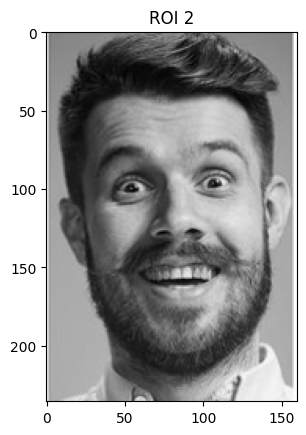

In [77]:
roi2 = cinza[0:250, 165:325]
plt.imshow(roi2, cmap='gray')
plt.title('ROI 2')

In [78]:
roi = roi2

In [79]:
roi.shape

(236, 160)

In [80]:
roi

array([[246, 182, 118, ..., 187, 255, 253],
       [246, 182, 118, ..., 187, 255, 253],
       [246, 182, 119, ..., 187, 255, 253],
       ...,
       [247, 206, 162, ..., 247, 254, 251],
       [248, 207, 164, ..., 248, 254, 252],
       [248, 208, 164, ..., 249, 254, 252]], dtype=uint8)

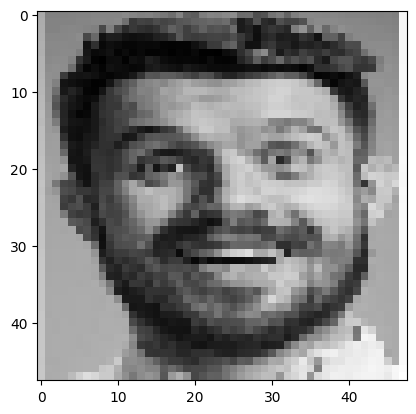

In [81]:
# redimensionar
roi = cv2.resize(roi, (48, 48)) # diminui os pixeis para a eficiência do modelo
plt.imshow(roi, cmap='gray')

In [82]:
roi.dtype

dtype('uint8')

In [83]:
roi = roi.astype('float')
roi.dtype

dtype('float64')

In [84]:
roi

array([[171., 132., 132., ..., 133., 130., 244.],
       [173., 134., 134., ..., 134., 132., 244.],
       [174., 134., 135., ..., 136., 135., 244.],
       ...,
       [198., 171., 171., ..., 206., 173., 247.],
       [199., 173., 172., ..., 236., 245., 250.],
       [199., 172., 173., ..., 231., 244., 253.]])

In [85]:
roi = roi / 255
roi

array([[0.67058824, 0.51764706, 0.51764706, ..., 0.52156863, 0.50980392,
        0.95686275],
       [0.67843137, 0.5254902 , 0.5254902 , ..., 0.5254902 , 0.51764706,
        0.95686275],
       [0.68235294, 0.5254902 , 0.52941176, ..., 0.53333333, 0.52941176,
        0.95686275],
       ...,
       [0.77647059, 0.67058824, 0.67058824, ..., 0.80784314, 0.67843137,
        0.96862745],
       [0.78039216, 0.67843137, 0.6745098 , ..., 0.9254902 , 0.96078431,
        0.98039216],
       [0.78039216, 0.6745098 , 0.67843137, ..., 0.90588235, 0.95686275,
        0.99215686]])

In [86]:
roi = img_to_array(roi) # 3d
roi

array([[[0.67058825],
        [0.5176471 ],
        [0.5176471 ],
        ...,
        [0.52156866],
        [0.50980395],
        [0.95686275]],

       [[0.6784314 ],
        [0.5254902 ],
        [0.5254902 ],
        ...,
        [0.5254902 ],
        [0.5176471 ],
        [0.95686275]],

       [[0.68235296],
        [0.5254902 ],
        [0.5294118 ],
        ...,
        [0.53333336],
        [0.5294118 ],
        [0.95686275]],

       ...,

       [[0.7764706 ],
        [0.67058825],
        [0.67058825],
        ...,
        [0.80784315],
        [0.6784314 ],
        [0.96862745]],

       [[0.78039217],
        [0.6784314 ],
        [0.6745098 ],
        ...,
        [0.9254902 ],
        [0.9607843 ],
        [0.98039216]],

       [[0.78039217],
        [0.6745098 ],
        [0.6784314 ],
        ...,
        [0.90588236],
        [0.95686275],
        [0.99215686]]], dtype=float32)

In [87]:
roi.shape # 3d

(48, 48, 1)

In [88]:
roi = np.expand_dims(roi, axis = 0) # 4d ---> squeeze pra diminuir
roi.shape

(1, 48, 48, 1)

In [89]:
# previsoes
preds = classificador_emocoes.predict(roi)[0]

1/1 [==============================] - 0s 174ms/step


In [90]:
preds

array([4.9882068e-04, 8.0351350e-07, 3.2137937e-04, 9.4396210e-01,
       6.4621971e-04, 3.0381107e-04, 5.4266848e-02], dtype=float32)

In [91]:
len(preds)

7

In [92]:
emotion_probability = np.max(preds)
emotion_probability

0.9439621

In [93]:
preds.argmax()

3

In [94]:
label = expressoes[preds.argmax()]
label

'Feliz'

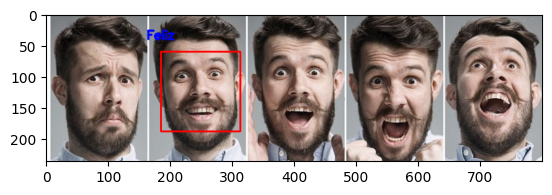

In [95]:
# resultados
cv2.putText(original, label, (162, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.65,
            (0, 0, 255), 2, cv2.LINE_AA)
cv2.rectangle(original, (185, 60), (185 + 128, 60 + 128), (255, 0, 0), 2)
plt.imshow(original)